In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import math
from DataGenerator import DataGenerator
import time

np.random.seed(0)
n = 2000
n_test = 2000
classify_times = []
accuracies = []
truths = np.array([-1] * int(n_test * 0.05) + [1] * int(n_test * (1 - 0.05)))

2000

# Data Generation

In [53]:


health_data, health_test = generator.generate_patient_vital_signs(n)
traffic_data, traffic_test = generator.generate_traffic_flow(n)
political_data, political_test = generator.generate_political_influence(n)
train_data = [health_data, traffic_data, political_data]
test_data = [health_test, traffic_test, political_test]

# Visualization

In [54]:
def visualize(data, pred=None): 
    if pred is not None:
        tp = (pred == 1) & (truths == 1)
        tn = (pred == -1) & (truths == -1)
        fp = (pred == 1) & (truths == -1)
        fn = (pred == -1) & (truths == 1)
        
        plt.scatter(data[tp,0], data[tp,1], color='blue', label='TP')
        plt.scatter(data[tn,0], data[tn,1], color='red', label='TN')
        plt.scatter(data[fp,0], data[fp,1], color='red', marker='x', label='FP')
        plt.scatter(data[fn,0], data[fn,1], color='blue', marker='x', label='FN')
        
        plt.title('model classification results')
  
    else:
        plt.scatter(data[:,0], data[:,1])
        plt.scatter(data[:,0], data[:,1])
        plt.title('training data')
        
    plt.xlabel('agent 1')
    plt.ylabel('agent 2')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.legend(loc="upper left")
    plt.show()
        
 
def predict_and_time(model, test):
    time_start = time.time()
    pred = model.predict(test)
    time_end = time.time()
    classify_times.append((model.__class__.__name__, time_end-time_start))
    errors = (pred != truths).sum()
    accuracy = (n_test - errors) / n_test
    accuracies.append((model.__class__.__name__, accuracy))
    return pred
        

# Modeling

In [55]:
def run_models(model, cluster=False, vis=True, ag=agents):
    
    print(np.array(train_data).shape)
    print("Running model...")
    for data in zip(train_data, test_data):
        if cluster:
            clf = model.fit(data[1], truths)
        else:
            clf = model.fit(data[0])
        pred = predict_and_time(clf, data[1])
        if vis: visualize(data[1], pred)


# Local Outlier Factor

(3, 2000, 2)
Running model...


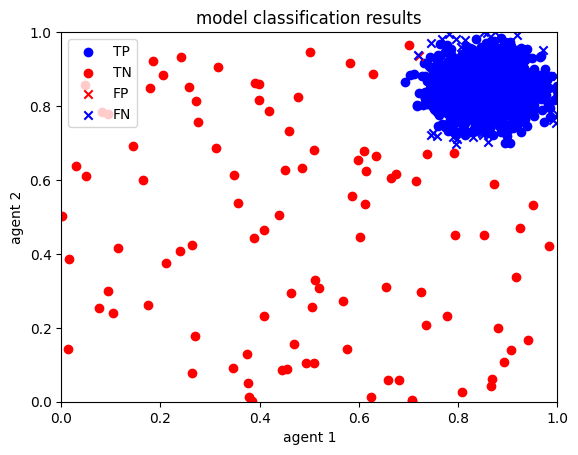

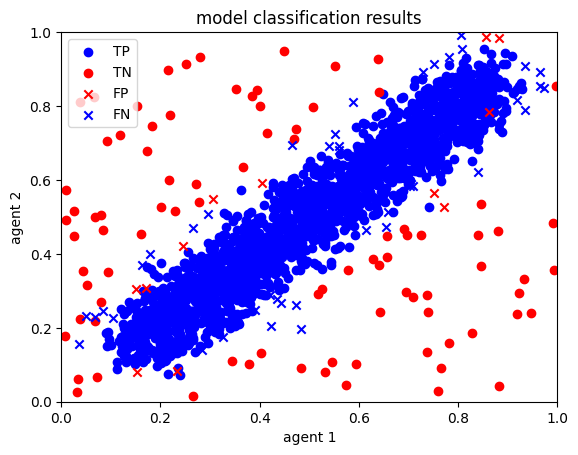

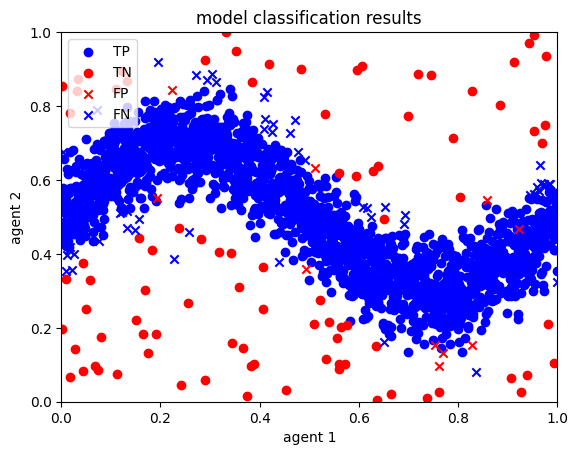

'\nX_scores = lof.negative_outlier_factor_\nradius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())\n\nscatter = plt.scatter(\n    health_data[:,0],\n    health_data[:,1],\n    s=1000*radius,\n    edgecolors="r",\n    facecolors="none",\n    label="Outlier scores"\n)\n'

In [56]:
lof = LocalOutlierFactor(n_neighbors=10, novelty=True)

run_models(lof)

'''
X_scores = lof.negative_outlier_factor_
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

scatter = plt.scatter(
    health_data[:,0],
    health_data[:,1],
    s=1000*radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores"
)
'''

# One Class SVM 

(3, 2000, 2)
Running model...


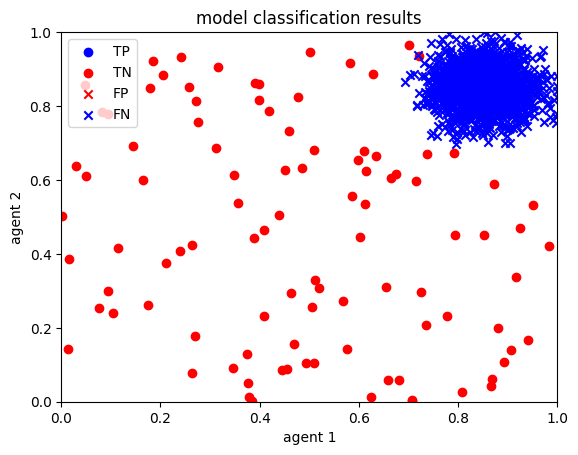

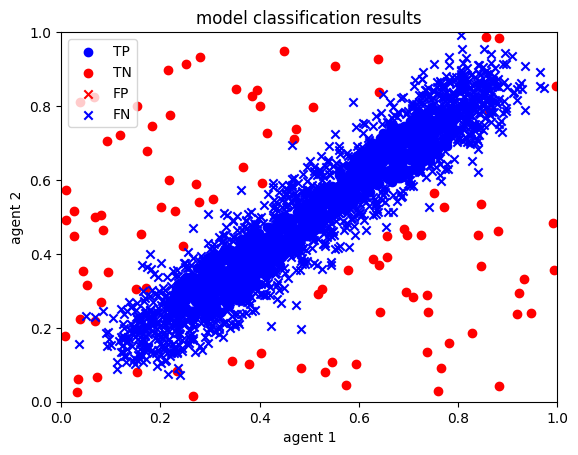

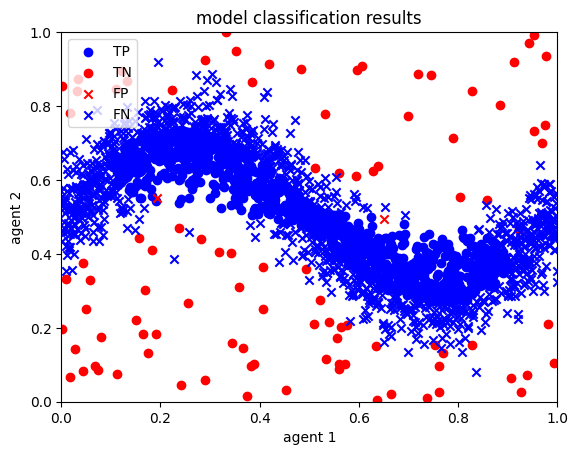

'\nclassify_times.append(("SVM", end_time - start_time))\nh = 0.02\nx_min, x_max = health_data[:,0].min() - 1, health_data[:,1].max() + 1\ny_min, y_max = health_data[:,1].min() - 1, health_data[:,1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                     np.arange(y_min, y_max, h))\nZ_linear = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])\nZ_linear = Z_linear.reshape(xx.shape)\nplt.contourf(xx, yy, Z_linear, cmap=plt.cm.PuBu, alpha=0.8)\nZ_linear = Z_linear.reshape(xx.shape)\n'

In [57]:
clf = OneClassSVM()
run_models(clf)

'''
classify_times.append(("SVM", end_time - start_time))
h = 0.02
x_min, x_max = health_data[:,0].min() - 1, health_data[:,1].max() + 1
y_min, y_max = health_data[:,1].min() - 1, health_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_linear = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.PuBu, alpha=0.8)
Z_linear = Z_linear.reshape(xx.shape)
'''

# Isolation Forest

(3, 2000, 2)
Running model...


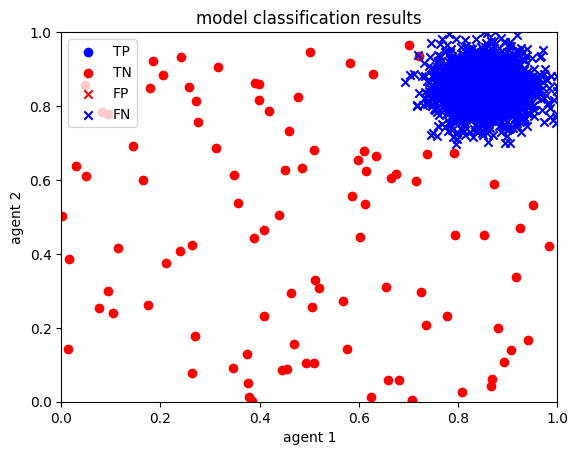

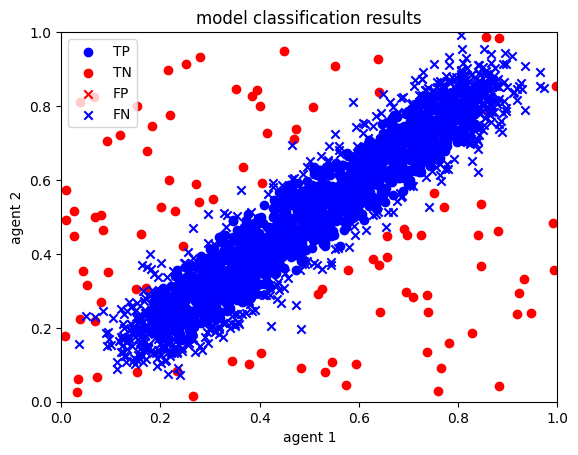

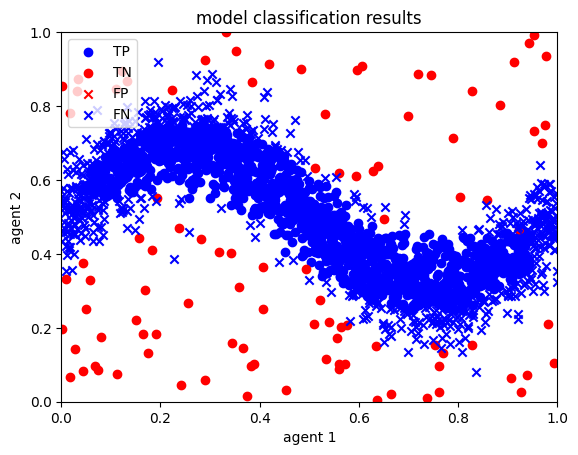

'\nh = 0.02\nx_min, x_max = health_data[:,0].min() - 1, health_data[:,1].max() + 1\ny_min, y_max = health_data[:,1].min() - 1, health_data[:,1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                     np.arange(y_min, y_max, h))\nZ_linear = clf.predict(np.c_[xx.ravel(), yy.ravel()])\nZ_linear = Z_linear.reshape(xx.shape)\n\ndisp = DecisionBoundaryDisplay(\n    xx0 = xx,\n    xx1 = yy,\n    response = Z_linear\n)\ndisp.plot()\n'

In [58]:
clf = IsolationForest(random_state=0)
run_models(clf)

'''
h = 0.02
x_min, x_max = health_data[:,0].min() - 1, health_data[:,1].max() + 1
y_min, y_max = health_data[:,1].min() - 1, health_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_linear = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

disp = DecisionBoundaryDisplay(
    xx0 = xx,
    xx1 = yy,
    response = Z_linear
)
disp.plot()
'''


# K Neighbors 

(3, 2000, 2)
Running model...


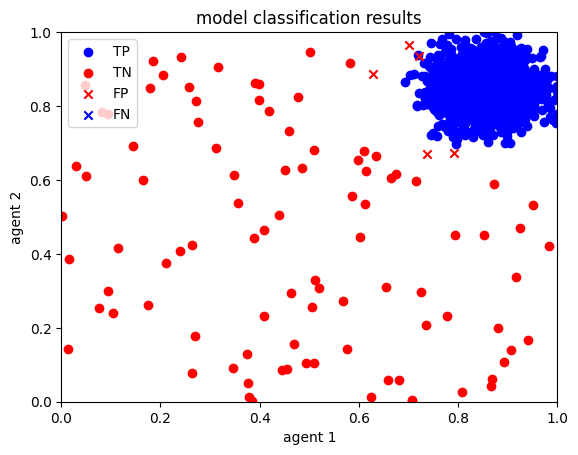

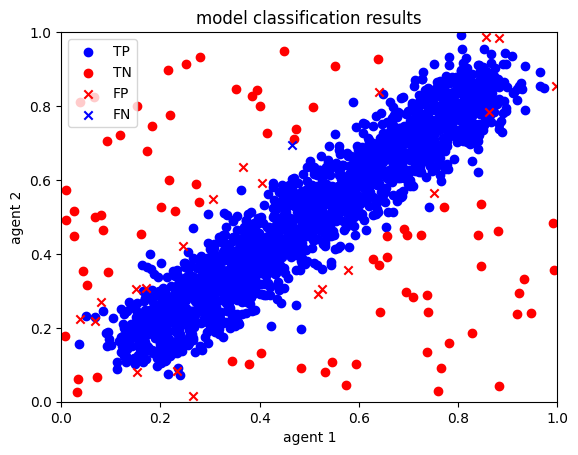

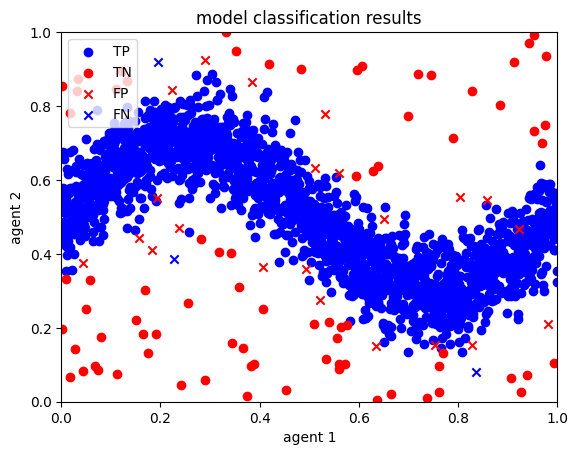

"\nh = 0.02\nx_min, x_max = health_data[:,0].min() - 1, health_data[:,1].max() + 1\ny_min, y_max = health_data[:,1].min() - 1, health_data[:,1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                     np.arange(y_min, y_max, h))\n\nZ_linear = clf.predict(np.c_[xx.ravel(), yy.ravel()])\nZ_linear = Z_linear.reshape(xx.shape)\ncmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])\nplt.pcolormesh(xx, yy, Z_linear, cmap=cmap_light)\n"

In [59]:
clf = KNeighborsClassifier(5)
run_models(clf, cluster=True)
'''
h = 0.02
x_min, x_max = health_data[:,0].min() - 1, health_data[:,1].max() + 1
y_min, y_max = health_data[:,1].min() - 1, health_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z_linear = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z_linear, cmap=cmap_light)
'''



# DBSCAN

In [60]:
'''
health_data_all = np.vstack((health_data, health_test))
for i in np.linspace(0.1,0.5,5):
    print("eps: ", i)
    clustering = DBSCAN(eps=i, min_samples=20).fit(health_data_all)
    labels = clustering.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[clustering.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = health_data_all[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = health_data_all[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()
'''

'\nhealth_data_all = np.vstack((health_data, health_test))\nfor i in np.linspace(0.1,0.5,5):\n    print("eps: ", i)\n    clustering = DBSCAN(eps=i, min_samples=20).fit(health_data_all)\n    labels = clustering.labels_\n    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)\n    n_noise_ = list(labels).count(-1)\n\n    unique_labels = set(labels)\n    core_samples_mask = np.zeros_like(labels, dtype=bool)\n    core_samples_mask[clustering.core_sample_indices_] = True\n\n    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]\n    for k, col in zip(unique_labels, colors):\n        if k == -1:\n            # Black used for noise.\n            col = [0, 0, 0, 1]\n\n        class_member_mask = labels == k\n\n        xy = health_data_all[class_member_mask & core_samples_mask]\n        plt.plot(\n            xy[:, 0],\n            xy[:, 1],\n            "o",\n            markerfacecolor=tuple(col),\n            markeredgecolor="k",\n            markersiz

# Performance Analysis

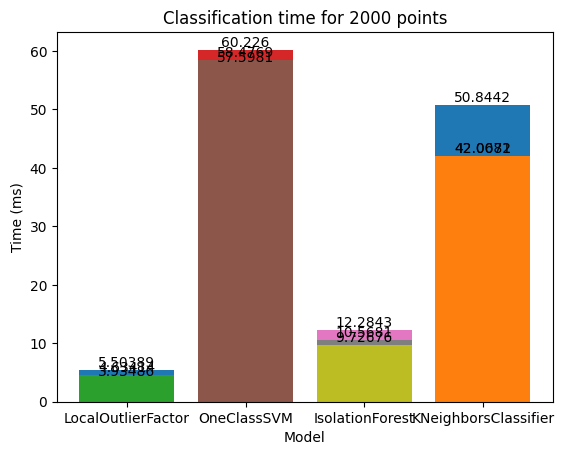

In [61]:
fig,ax = plt.subplots()
for times in classify_times:
    p = ax.bar(times[0], times[1]*1000)
    ax.bar_label(p, label_type='edge')
    
plt.title("Classification time for " + str(n_test) +" points")
plt.ylabel("Time (ms)")
plt.xlabel("Model")
plt.show()

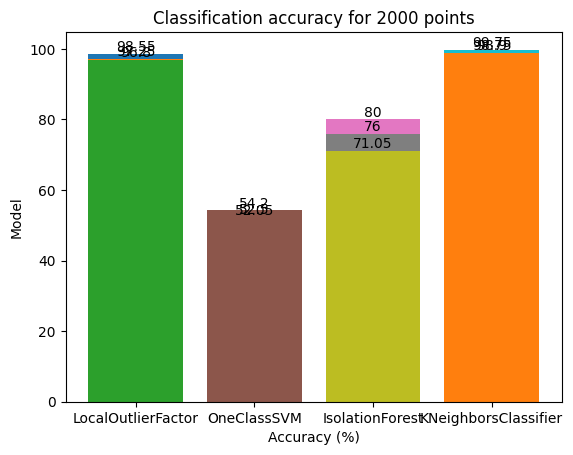

In [62]:
fig,ax = plt.subplots()
for accuracy in accuracies:
    p = ax.bar(accuracy[0], accuracy[1]*100)
    ax.bar_label(p)
    
plt.title("Classification accuracy for " + str(n_test) +" points")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.show()

In [63]:
for i in range(2, 300):
    print("num agents: ", agents)
    classify_times = []
    agents=i
    lof = LocalOutlierFactor(novelty=True)
    run_models(clf, vis=False)
    print(classify_times)
    plt.scatter(i, classify_times[2][1]*1000, color="blue")

num agents:  2
(3, 2000, 2)
Running model...


TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
for i in range(2, 300):
    print("num agents: ", agents)
    classify_times = []
    agents=i
    clf = OneClassSVM()
    run_models(clf, vis=False)
    print(classify_times)
    plt.scatter(i, classify_times[2][1]*1000, color="blue")

In [ ]:
for i in range(2, 300):
    print("num agents: ", agents)
    classify_times = []
    agents = i
    clf = IsolationForest(random_state=0)
    run_models(clf, vis=False)
    print(classify_times)
    plt.scatter(i, classify_times[2][1] * 1000, color="blue")

In [ ]:
for i in range(2, 300):
    print("num agents: ", agents)
    classify_times = []
    agents=i
    clf = KNeighborsClassifier(5)
    run_models(clf, vis=False)
    print(classify_times)
    plt.scatter(i, classify_times[2][1]*1000, color="blue")